In [ ]:
#teleportion only needs a few more gates than we saw in Hello World. What is teleportation? 
#copying bit value from one qbit to another

In [1]:
from qiskit import *

In [2]:
circuit = QuantumCircuit(3,3)   #3 qbits and 3 classical

In [3]:
%matplotlib inline
circuit.draw()

q_0: |0>
        
q_1: |0>
        
q_2: |0>
        
 c_0: 0 
        
 c_1: 0 
        
 c_2: 0

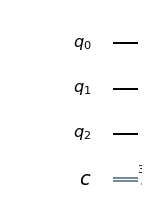

In [4]:
circuit.draw(output='mpl')   #mpl = matplotlib

In [5]:
#transfer/teleport q0 state to q2 .  q1 is a resource to get it done.  first apply x gate to q0 to make it state 1

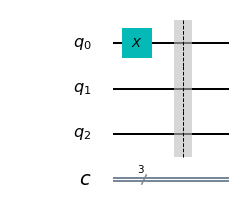

In [6]:
circuit.x(0)   
circuit.barrier()  # What is this? A: just a visual barrier in the drawing
circuit.draw(output='mpl')

In [7]:
#so have barrier and after that, q0 has state 1 (not shown)
#here comes teleportation
#hadamard and a control-x from q1 to q2

In [8]:
circuit.h(1)
circuit.cx(1,2)

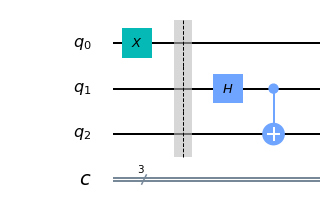

In [9]:
circuit.draw(output='mpl')

In [10]:
#now q1 and q2 are entangled! (simulated,for now)

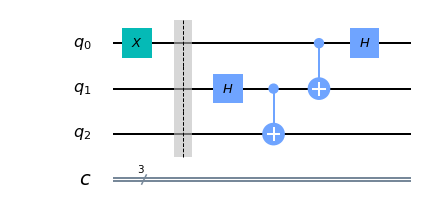

In [11]:
circuit.cx(0,1) #going from q0 to q1
circuit.h(0)   #hadamard on q0
circuit.draw(output='mpl')

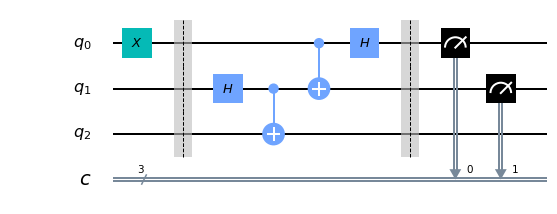

In [12]:
#now do two measurements, one on q0 and one on q1
circuit.barrier()  #draw a barrier
circuit.measure([0,1],[0,1])   #easurements on [q0 and q1] and put in classical [c0 and c1 ]
circuit.draw(output='mpl')

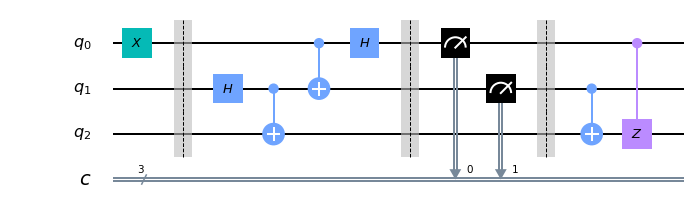

In [13]:
#to finish teleport,we  add two gates, control-x from q1 to q2 and control-z from q1 to q2
circuit.barrier()  
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

In [14]:
#claim is that that state 1 (a.k.a [1 0] ) after the first barrier has been teleported 
#to q2 after the third barrier. Verify this by applying a measurement to q2 and see 
#that it is state 1 (aka [1 0]) instead of where is started which is state 0 
#(aka [0 1])

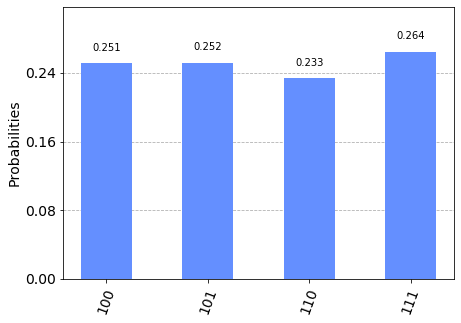

In [15]:
circuit.measure(2,2)  #measure q2 and put into c2
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

how to read that.  the 100,101,110, 111  are read bottom up like this: 
p100, that is c2=1,c1=0,c0=0.   
101 is c2=1,c1=0,c0=1  etc

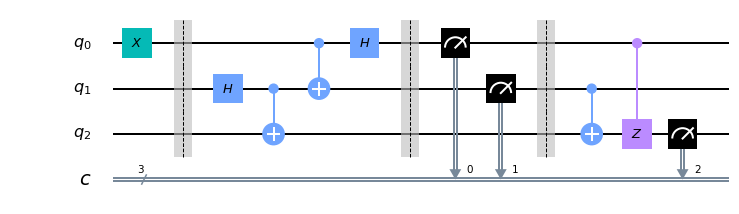

In [16]:
circuit.draw(output='mpl')

In [17]:
print(counts)

{'101': 258, '100': 257, '110': 239, '111': 270}


In [18]:
#what is going on there?  a: for 100  263 is the number of counts while .257 is 25.7% of the number of 
#shots that we asked for (i.e. 1024)

Challenge:  Try to teleport this state  1/root2 [0 1]+[1 0]     to q2
This is extra that he did not show

In [19]:
# what we did before was teleport [10] from q0 to q2.  

In [20]:
circuit2 = QuantumCircuit(3,3)   #3 qbits and 3 classical

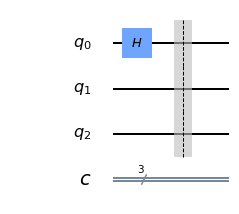

In [21]:
circuit2.h(0)   
circuit2.barrier()  # What is this? A: just a visual barrier in the drawing
circuit2.draw(output='mpl')

In [22]:
#equivalent drawing
%matplotlib inline
circuit2.draw()

┌───┐ ░ 
q_0: |0>┤ H ├─░─
        └───┘ ░ 
q_1: |0>──────░─
              ░ 
q_2: |0>──────░─
              ░ 
 c_0: 0 ════════
                
 c_1: 0 ════════
                
 c_2: 0 ════════

In [23]:
circuit.h(1)
circuit.cx(1,2)
circuit.barrier() 
circuit.cx(0,1) 
circuit.h(0)  
circuit.barrier() 
circuit.measure([0,1],[0,1]) 
circuit.barrier()  
circuit.cx(1,2)
circuit.cz(0,2)

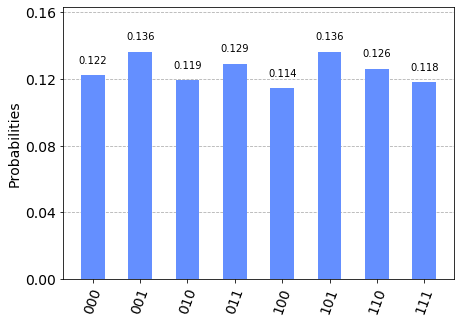

In [24]:
circuit.measure(2,2)  #measure q2 and put into c2
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

Is this right?